# Q1
## (a)(b)

In [53]:
from sklearn.impute import KNNImputer
from utils import *
import matplotlib.pyplot as plt

def knn_impute_by_user(matrix, valid_data, k):
    """ Fill in the missing values using k-Nearest Neighbors based on
    student similarity. Return the accuracy on valid_data.

    See https://scikit-learn.org/stable/modules/generated/sklearn.
    impute.KNNImputer.html for details.

    :param matrix: 2D sparse matrix
    :param valid_data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param k: int
    :return: float
    """
    nbrs = KNNImputer(n_neighbors=k)
    # We use NaN-Euclidean distance measure.
    mat = nbrs.fit_transform(matrix)
    acc = sparse_matrix_evaluate(valid_data, mat)
    return acc

def plot_knn_valid(sparse_matrix, val_data, test_data, k_list):
    accu_list = []
    
    for k in k_list:
        accu_list.append(knn_impute_by_user(sparse_matrix, val_data, k))
    
    plt.plot(k_list, accu_list, 'b-')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.show()
    
    k_best = 11
    test_accu = knn_impute_by_user(sparse_matrix, test_data, k_best)
    print("The chosen k is 11 and the test accuracy is " + str(test_accu))

    
def main():
    sparse_matrix = load_train_sparse("./data").toarray()
    val_data = load_valid_csv("./data")
    test_data = load_public_test_csv("./data")

    print("Sparse matrix:")
    print(sparse_matrix)
    print("Shape of sparse matrix:")
    print(sparse_matrix.shape)

    #####################################################################
    # TODO:                                                             #
    # Compute the validation accuracy for each k. Then pick k* with     #
    # the best performance and report the test accuracy with the        #
    # chosen k*.                                                        #
    #####################################################################
    pass
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################



In [54]:
sparse_matrix = load_train_sparse("data").toarray()
val_data = load_valid_csv("data")
test_data = load_public_test_csv("data")

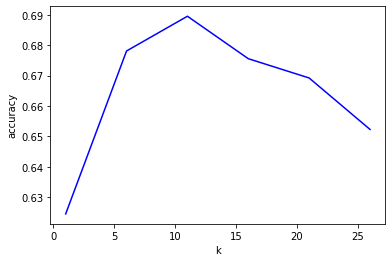

The chosen k is 11 and the test accuracy is 0.6841659610499576


In [55]:
k_list = [1, 6, 11, 16, 21, 26]
accu_list = plot_knn_valid(sparse_matrix, val_data, test_data, k_list)

## (c)

In [44]:
def knn_impute_by_item(matrix, valid_data, k):
    """ Fill in the missing values using k-Nearest Neighbors based on
    question similarity. Return the accuracy on valid_data.

    :param matrix: 2D sparse matrix
    :param valid_data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param k: int
    :return: float
    """
    #####################################################################
    # TODO:                                                             #
    # Implement the function as described in the docstring.             #
    #####################################################################
    matrix = matrix.T
    nbrs = KNNImputer(n_neighbors=k)
    # We use NaN-Euclidean distance measure.
    mat = nbrs.fit_transform(matrix)
    acc = sparse_matrix_evaluate(valid_data, mat.T)
    
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return acc


def item_based_report_knn(sparse_matrix, valid_data, test_data, k_list):
    accu_list = []
    
    for k in k_list:
        accu_list.append(knn_impute_by_item(sparse_matrix, valid_data, k))
    
    plt.plot(k_list, accu_list, 'b-')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.show()
    
    k_best = 21
    test_accu = knn_impute_by_item(sparse_matrix, test_data, k_best)
    print("The chosen k is 21 and the test accuracy is " + str(test_accu))

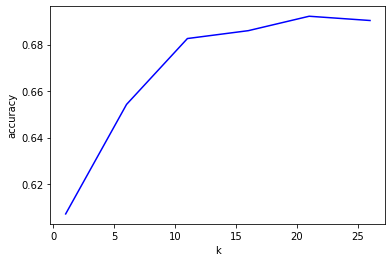

The chosen k is 21 and the test accuracy is 0.6816257408975445


In [52]:
item_based_report_knn(sparse_matrix, val_data, test_data, k_list)

## (d)

The test accuracy indicates that user-based collaborative filtering performs better. Besides, the computational time it takes is much less than the computational time that item-based algorithm takes.

## (e)

1. The computational is expensive.
2. The dimension of data is high, and in high dimensions, most points have approximately the same distance.